In [1]:
import os

# Set current working directory to parent folder
os.chdir(os.path.abspath(".."))

In [2]:
import time
import pickle
import pandas as pd
import numpy as np

import keras
from keras.models import load_model

import librosa
import librosa.display

In [3]:
df_annotations = pd.read_excel(f'./data/annotations_2.xlsx')

In [4]:
# Viendo el archivo partitions.txt se que el conversation 47 es test
df_annotations[df_annotations['Name'].str.slice(0,21) == 'MSP-Conversation_0047']

,Name,Emotion,Annotator,PC_Num,Part_Num,start_time,end_time,Audio_Name
105,MSP-Conversation_0047_1_005.csv,Valence,5,47,1,0.0000,332.8091,MSP-Conversation_0047.wav
106,MSP-Conversation_0047_1_006.csv,Valence,6,47,1,0.0000,332.8091,MSP-Conversation_0047.wav
107,MSP-Conversation_0047_1_007.csv,Valence,7,47,1,0.0000,332.8091,MSP-Conversation_0047.wav
108,MSP-Conversation_0047_1_008.csv,Valence,8,47,1,0.0000,332.8091,MSP-Conversation_0047.wav
109,MSP-Conversation_0047_1_009.csv,Valence,9,47,1,0.0000,332.8091,MSP-Conversation_0047.wav
110,MSP-Conversation_0047_1_013.csv,Valence,13,47,1,0.0000,332.8091,MSP-Conversation_0047.wav
111,MSP-Conversation_0047_2_002.csv,Valence,2,47,2,332.8091,617.1787,MSP-Conversation_0047.wav
112,MSP-Conversation_0047_2_005.csv,Valence,5,47,2,332.8091,617.1787,MSP-Conversation_0047.wav
113,MSP-Conversation_0047_2_006.csv,Valence,6,47,2,332.8091,617.1787,MSP-Conversation_0047.wav
114,MSP-Conversation_0047_2_007.csv,Valence,7,47,2,332.8091,617.1787,MSP-Conversation_0047.wav


In [5]:
PC_Num, Part_Num = 47, 1

## Obtain input data

In [6]:
from src.dataload import load_audio_data

data, stamp, sr = load_audio_data(df_annotations, PC_Num, Part_Num)

df_input = pd.DataFrame(data = np.stack([stamp,data]).T, columns = ['Time','Data'])

## Target Data

In [7]:
from src.dataload import audio_select_mean_vote
from src.emotion_translation import ekman_emotion

# MEAN VOTE
df = audio_select_mean_vote(df_annotations, PC_Num, Part_Num)

# EKMAN
df['Emotion'] = df.apply(lambda row : ekman_emotion(row['Valence'], row['Arousal'], row['Dominance']), axis = 1)

C:\Users\emanu\Documents\GitHub\mspconv_ftlab\src\dataload.py:76: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  time = pd.concat([time, temp_df], ignore_index = True)
C:\Users\emanu\Documents\GitHub\mspconv_ftlab\src\dataload.py:79: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\Documents\GitHub\mspconv_ftlab\src\dataload.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries befor

In [8]:
# Remover duplicados
print('Antes',len(df))
df = df.set_index('Time').drop_duplicates().reset_index()
print('Despues', len(df))
df = df.set_index('Time')[['Emotion']].drop_duplicates().reset_index()
print('Final', len(df))

Antes 223310
Despues 23986
Final 4


In [9]:
df

,Time,Emotion
0,0.0400,disgust
1,39.4131,joy
2,40.1500,surprise
3,104.7500,anger


## Create input - target

In [31]:
time_index = pd.concat([df['Time'],df_input['Time']], ignore_index = True).drop_duplicates().sort_values().reset_index(drop = True)

In [32]:
df_train = pd.merge(time_index, df_input, how = 'left', on = 'Time')
df_train = pd.merge(df_train, df, how = 'left', on = 'Time')

df_train = df_train.fillna(method='ffill').fillna(method='bfill')

C:\Users\emanu\AppData\Local\Temp\ipykernel_9552\2434100850.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train = df_train.fillna(method='ffill').fillna(method='bfill')


In [11]:
from src.feature_extraction import extract_classical_features

start = time.time()

# Tenemos una predicción cada 2.5 segundos
frame_duration = 2.5

df_train['Frame'] = np.floor(df_train['Time'] / frame_duration)
df_train['Frame'] = df_train['Frame'].astype(int)

X, Y = [], []
for frame in df_train['Frame'].unique():
    
    df_frame = df_train[df_train['Frame'] == frame]
    
    feature = extract_classical_features(df_frame['Data'].values, sample_rate = sr)
    emotion = df_frame.groupby('Emotion').count().sort_values(by = 'Time', ascending = False).reset_index().loc[0,'Emotion']
    
    X.append(feature)
    Y.append(emotion)
        

Features = pd.DataFrame(X)
Features['labels'] = Y

end = time.time()

print(end - start)

3.1958882808685303


## Pre-Process

In [12]:
with open('./data/MODELS/scaler','rb') as f:
    scaler = pickle.load(f)

In [13]:
with open('./data/MODELS/encoder','rb') as f:
    encoder = pickle.load(f)

In [14]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [15]:
Y = encoder.transform(np.array(Y).reshape(-1,1)).toarray()

In [16]:
X = scaler.transform(X)

In [17]:
X = np.expand_dims(X, axis=2)

## Prediction

In [18]:
model = load_model('./data/MODELS/model.keras')

In [19]:
pred_test = model.predict(X)

5/5 [==============================] - 0s 6ms/step


In [20]:
y_pred = encoder.inverse_transform(pred_test)

In [21]:
y_test = encoder.inverse_transform(Y)

In [22]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,anger,disgust
1,joy,disgust
2,fear,disgust
3,joy,disgust
4,joy,disgust
5,joy,disgust
6,fear,disgust
7,surprise,disgust
8,joy,disgust
9,joy,disgust


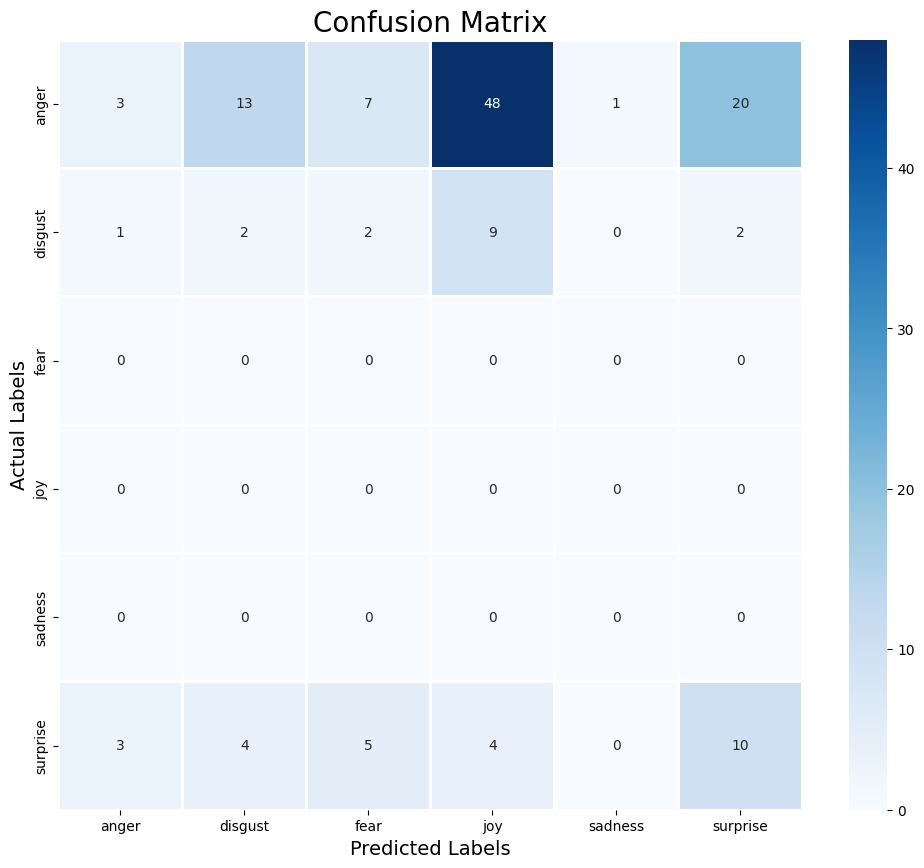

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.43      0.03      0.06        92
     disgust       0.11      0.12      0.11        16
        fear       0.00      0.00      0.00         0
         joy       0.00      0.00      0.00         0
     sadness       0.00      0.00      0.00         0
    surprise       0.31      0.38      0.34        26

    accuracy                           0.11       134
   macro avg       0.14      0.09      0.09       134
weighted avg       0.37      0.11      0.12       134



C:\Users\emanu\Anaconda3\envs\SER\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\emanu\Anaconda3\envs\SER\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\emanu\Anaconda3\envs\SER\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
